In [44]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)  #set a random seed for np.random
num_observations = 5000   #set the number of observations to generate for each multivariate sampleset generated

sample1 = np.random.multivariate_normal(mean=[0, 0], # Mean of the N-dimensional distribution.
                                   cov=[[1, .75],[.75, 1]],  #size of the matrix
                                   size=num_observations) #stack both of them
sample2 = np.random.multivariate_normal(mean=[1, 4], 
                                   cov=[[1, .75],[.75, 1]], 
                                   size=num_observations)

# 5000 rows, 2 columns
sample1.shape, sample2.shape

((5000, 2), (5000, 2))

In [46]:
# stack the nd-arrays vertically, row-wise, such that it is as if the data can be sort of separated
simulated_separableish_features = np.vstack((x1, x2))
simulated_separableish_features.shape # have a 10,000 rows, 2 columns

(10000, 2)

In [50]:
#create labels in order to identify them in our plot.
# top half of the simulated_labels array (first 50k) will be 0s, and bottom half (next 50k) will be 1s
# Can color them based on this label
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations))) # stacks the arrays horizontally, column-wise
simulated_labels.shape # 10,000 rows

(10000,)

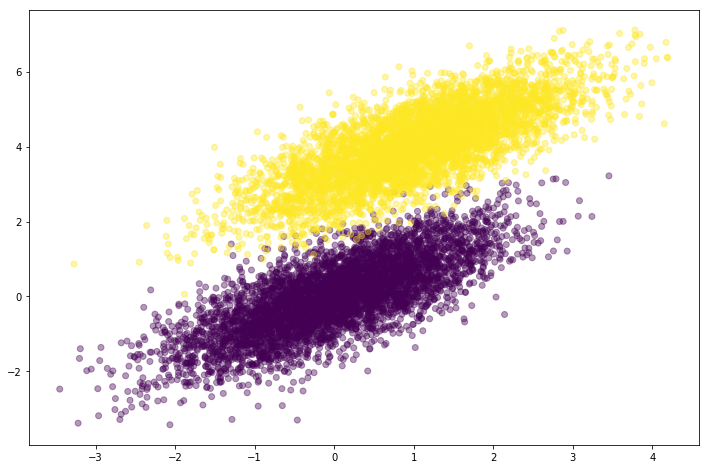

In [51]:
plt.figure(figsize=(12,8)) #make the plot bigger
plt.scatter(simulated_separableish_features[:, 0], # select all rows, 1st column --> the x independent variable
            simulated_separableish_features[:, 1], # select all rows, 2nd column --> the y dependent variable
            c = simulated_labels, #set the color of each observation
            alpha = .4)

In [92]:
# our simulated labels generated will be our "true" y
y = simulated_labels.reshape((simulated_separableish_features.shape[0],1))
y



array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [94]:
# Let's add in a bias term
bias_term = np.ones((simulated_separableish_features.shape[0],1))
bias_term
data = np.hstack((bias_term,
                  simulated_separableish_features,
                 y))
data
# simulated_separableish_features.shape,simulated_labels.shape

array([[ 1.        , -0.2015173 , -0.68335816,  0.        ],
       [ 1.        ,  0.37451947, -0.82808223,  0.        ],
       [ 1.        , -0.16189468, -1.24710655,  0.        ],
       ...,
       [ 1.        ,  2.32559622,  4.18132864,  1.        ],
       [ 1.        ,  0.24707288,  4.22940428,  1.        ],
       [ 1.        ,  1.71902244,  4.82535048,  1.        ]])

Sigmoid function:
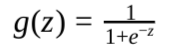

In [119]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


Create a vectorized cost function:
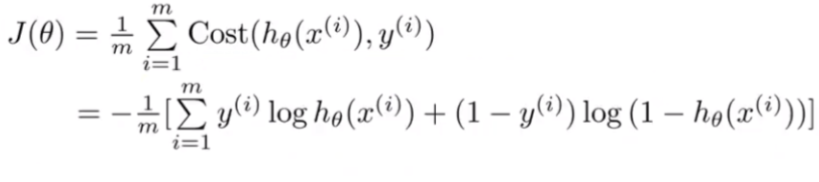

In [125]:
# Initialize our starting parameter, θ, as a vector
# Since we have 3 features,we need 3 parameters 
Theta = np.array([[0],
                  [0],
                  [0]])
Theta.shape

(3, 1)

### We define the cost function, J(θ)

In [179]:
def cost_func(x,y,theta):
    """
        args:
            x - n-d array
            y - n-d array
            theta - n-d array
        
    """
    m = x.shape[0]
    h = sigmoid(np.dot(x, theta)) # h is the hypothesis
    cost = (-1/m)*(np.dot(y.T, np.log(h)) + np.dot((1 -y.T), np.log(1 - h)))
    return cost[0] #return a float instead of an array
X = data[:,:3]  #slice to include x0, x1, x2
y = data[:,3:4] #slice to include only dependent label y. 
# Can alternatively just pass in the simulated_labels array without combining with the dataset

cost_func(X,y,Theta) #let's test it out!

array([0.69314718])

### To implement gradient descent, gotta find the derivative term
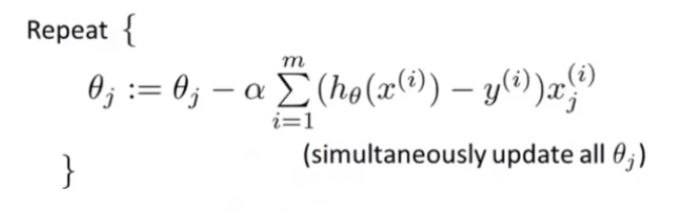

In [185]:
def single_step_gradient_descent(x , y, theta, alpha):
    m = x.shape[0]
    h = sigmoid(np.dot(x, theta)) # x.shape is (10k, 3), and theta.shape is (3,1) 
    der = np.dot(x.T, (h - y)); #calculate the derivative term
    theta = theta - alpha * der #change theta 
    previous_step= abs(alpha * der) #select the absolute value of the step for each parameter
    previous_step_size = np.amax(previous_step)
    return theta, previous_step_size
single_step_gradient_descent(X,y,Theta,0.01)

(array([[  0.        ],
        [ 24.65808415],
        [100.05136738]]), 100.05136737648627)

In [186]:
start_theta = Theta #starting x variable
alpha = 0.01 #learning rate
precision = 0.000001  # the limit of the smallest step that we want the algorithm to take.
previous_step_size = current_x

In [202]:
def gradient_descent(x, y, theta, alpha, precision):
    
    iterations = 0
    
    # perform first iteration without loop first.
    theta, previous_step_size = single_step_gradient_descent(x,y,theta,alpha)
    iterations += 1
    
    while previous_step_size > precision: #stop once the step size reaches our precision cut-off
        theta, previous_step_size = single_step_gradient_descent(x,y,theta,alpha)
        iterations += 1
        if iterations % 10000 == 0:
            print("No of iterations, cost: {}, {}".format(iterations,cost_func(x,y,theta)))
    
    min_cost = cost_func(x,y,theta) #calculate the minimum cost found
    print("The global minimum where theta is \n %s" % theta)
    print("The global minimum cost is %f" % min_cost)
    print("No. of iterations required: %i" % iterations)
    return theta
gradient_descent(X,y,Theta,0.001, 0.001)

The global minimum where theta is 
 [[-12.95744393]
 [ -4.65873213]
 [  7.63526734]]
The global minimum cost is 0.014150
No. of iterations required: 1487


array([[-12.95744393],
       [ -4.65873213],
       [  7.63526734]])

In [203]:
final_theta = gradient_descent(X,y,Theta,0.001, 0.00001)

The global minimum where theta is 
 [[-14.07886002]
 [ -5.05428119]
 [  8.28183147]]
The global minimum cost is 0.014073
No. of iterations required: 7253


In [198]:
# final_theta = gradient_descent(X,y,Theta,0.001, 0.0000001)

In [199]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)
print(clf.intercept_, clf.coef_)

[-13.99400825] [[-5.02712589  8.23286817]]


## Something is wrong here... can you fix it?

In [232]:
def predict(theta, X):
    '''Predict whether the label
    is 0 or 1 using learned logistic
    regression parameters '''
    print(X.shape)
    m, n = X.shape
    p = np.zeros(shape=(m, 1))

    h = sigmoid(X.dot(theta.T))
    print(h)

    for it in range(0, h.shape[0]):
        print(it)
        if h[it].any() > 0.5:
            p[it, 0] = 1
        else:
            p[it, 0] = 0

    return p
predict(final_theta, np.array([[10]]))

(1, 1)
[[7.18270159e-62 1.12081954e-22 1.00000000e+00]]
0


array([[1.]])